In [1]:
import requests
import pandas as pd
import re
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt


In [2]:
#Make date series
datestring='20210401'

In [3]:
rt= requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date='+datestring+'&stockNo=2330')

In [4]:
rt.text

'"110年04月 2330 台積電           各日成交資訊"\r\n"日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數",\r\n"110/04/01","45,972,766","27,520,742,963","598.00","602.00","594.00","602.00","+15.00","48,170",\r\n"110/04/06","37,664,216","23,045,132,094","615.00","616.00","608.00","610.00","+8.00","42,422",\r\n"110/04/07","28,140,964","17,175,949,080","614.00","614.00","608.00","610.00"," 0.00","28,395",\r\n"110/04/08","26,658,283","16,217,570,357","606.00","613.00","603.00","613.00","+3.00","32,098",\r\n"110/04/09","31,601,619","19,344,167,081","618.00","618.00","609.00","610.00","-3.00","28,920",\r\n"110/04/12","23,319,822","14,155,495,430","612.00","613.00","603.00","605.00","-5.00","33,422",\r\n"110/04/13","27,386,926","16,638,680,378","604.00","613.00","604.00","605.00"," 0.00","30,438",\r\n"110/04/14","31,144,922","18,868,308,243","608.00","612.00","600.00","612.00","+7.00","41,234",\r\n"110/04/15","36,394,255","22,332,532,476","612.00","619.00","607.00","619.00","+7.00","40,541",\r\n"110/04

In [5]:
rt=rt.text.split('\n')
del rt[0]
del rt[-6:]

In [11]:
# make raw data into Dataframe
# date as pandas date time format
# numbers as float

rt=rt.text.split('\n') # seperate line by line
del rt[0]              # delete unwanted first row
del rt[-6:]            # delete unwanted last 6 rows

AttributeError: 'list' object has no attribute 'text'

# context process

In [12]:
# remove unwanted symbles from raw data 
trade_detail=[]
for subcc in rt:
    subcc=subcc.replace(',\r','')
    subcc=subcc.replace('\",\"','\":\"')
    subcc = subcc.replace('\"','')
    subcc =subcc.replace(',','')
    subcc= re.sub('[+]','',subcc)
    #print (subcc.split(':'))

    trade_detail.append(subcc.split(':'))


In [13]:
trade_detail

[['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'],
 ['110/04/01',
  '45972766',
  '27520742963',
  '598.00',
  '602.00',
  '594.00',
  '602.00',
  '15.00',
  '48170'],
 ['110/04/06',
  '37664216',
  '23045132094',
  '615.00',
  '616.00',
  '608.00',
  '610.00',
  '8.00',
  '42422'],
 ['110/04/07',
  '28140964',
  '17175949080',
  '614.00',
  '614.00',
  '608.00',
  '610.00',
  ' 0.00',
  '28395'],
 ['110/04/08',
  '26658283',
  '16217570357',
  '606.00',
  '613.00',
  '603.00',
  '613.00',
  '3.00',
  '32098'],
 ['110/04/09',
  '31601619',
  '19344167081',
  '618.00',
  '618.00',
  '609.00',
  '610.00',
  '-3.00',
  '28920'],
 ['110/04/12',
  '23319822',
  '14155495430',
  '612.00',
  '613.00',
  '603.00',
  '605.00',
  '-5.00',
  '33422'],
 ['110/04/13',
  '27386926',
  '16638680378',
  '604.00',
  '613.00',
  '604.00',
  '605.00',
  ' 0.00',
  '30438'],
 ['110/04/14',
  '31144922',
  '18868308243',
  '608.00',
  '612.00',
  '600.00',
  '612.00',
  '7.00',
  '41234']

In [14]:
head1=trade_detail.pop(0)
head1

['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']

In [15]:
trade_detail

[['110/04/01',
  '45972766',
  '27520742963',
  '598.00',
  '602.00',
  '594.00',
  '602.00',
  '15.00',
  '48170'],
 ['110/04/06',
  '37664216',
  '23045132094',
  '615.00',
  '616.00',
  '608.00',
  '610.00',
  '8.00',
  '42422'],
 ['110/04/07',
  '28140964',
  '17175949080',
  '614.00',
  '614.00',
  '608.00',
  '610.00',
  ' 0.00',
  '28395'],
 ['110/04/08',
  '26658283',
  '16217570357',
  '606.00',
  '613.00',
  '603.00',
  '613.00',
  '3.00',
  '32098'],
 ['110/04/09',
  '31601619',
  '19344167081',
  '618.00',
  '618.00',
  '609.00',
  '610.00',
  '-3.00',
  '28920'],
 ['110/04/12',
  '23319822',
  '14155495430',
  '612.00',
  '613.00',
  '603.00',
  '605.00',
  '-5.00',
  '33422'],
 ['110/04/13',
  '27386926',
  '16638680378',
  '604.00',
  '613.00',
  '604.00',
  '605.00',
  ' 0.00',
  '30438'],
 ['110/04/14',
  '31144922',
  '18868308243',
  '608.00',
  '612.00',
  '600.00',
  '612.00',
  '7.00',
  '41234'],
 ['110/04/15',
  '36394255',
  '22332532476',
  '612.00',
  '619.00

In [16]:
#Modify the date format from YYY/MM/DD to YYYY-MM-DD
for i in range(0,len(trade_detail)):
    
    a=trade_detail[i][0].split('/')

    a[0]=str(int(a[0])+1911)
    trade_detail[i][0]='-'.join(a)
    #print(trade_detail[i][0])

In [17]:
df = pd.DataFrame(np.array(trade_detail),
                   columns=head1)

In [18]:
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-04-01,45972766,27520742963,598.00,602.00,594.00,602.00,15.00,48170
1,2021-04-06,37664216,23045132094,615.00,616.00,608.00,610.00,8.00,42422
2,2021-04-07,28140964,17175949080,614.00,614.00,608.00,610.00,0.00,28395
3,2021-04-08,26658283,16217570357,606.00,613.00,603.00,613.00,3.00,32098
4,2021-04-09,31601619,19344167081,618.00,618.00,609.00,610.00,-3.00,28920
5,2021-04-12,23319822,14155495430,612.00,613.00,603.00,605.00,-5.00,33422
6,2021-04-13,27386926,16638680378,604.00,613.00,604.00,605.00,0.00,30438
7,2021-04-14,31144922,18868308243,608.00,612.00,600.00,612.00,7.00,41234
8,2021-04-15,36394255,22332532476,612.00,619.00,607.00,619.00,7.00,40541
9,2021-04-16,49952191,30335377876,610.00,611.00,603.00,610.00,-9.00,67601


In [16]:
df[['成交股數','成交金額','開盤價','最高價','最低價','收盤價','漲跌價差','成交筆數']]=df[['成交股數','成交金額','開盤價','最高價','最低價','收盤價','漲跌價差','成交筆數']].astype(float)

In [ ]:
plt.style.use("ggplot")

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=100)

In [13]:
df.loc[0:]

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-04-01,45972766,27520742963,598.00,602.00,594.00,602.00,15.00,48170
1,2021-04-06,37664216,23045132094,615.00,616.00,608.00,610.00,8.00,42422
2,2021-04-07,28140964,17175949080,614.00,614.00,608.00,610.00,0.00,28395
3,2021-04-08,26658283,16217570357,606.00,613.00,603.00,613.00,3.00,32098
4,2021-04-09,31601619,19344167081,618.00,618.00,609.00,610.00,-3.00,28920
5,2021-04-12,23319822,14155495430,612.00,613.00,603.00,605.00,-5.00,33422
6,2021-04-13,27386926,16638680378,604.00,613.00,604.00,605.00,0.00,30438
7,2021-04-14,31144922,18868308243,608.00,612.00,600.00,612.00,7.00,41234
8,2021-04-15,36394255,22332532476,612.00,619.00,607.00,619.00,7.00,40541
9,2021-04-16,49952191,30335377876,610.00,611.00,603.00,610.00,-9.00,67601


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


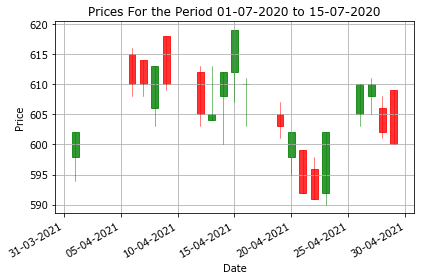

In [21]:

# import required packages
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpdates
  
#plt.style.use('dark_background')
  
# extracting Data for plotting
#df = pd.read_csv('data.csv')
df5 = df[['日期', '開盤價', '最高價', 
         '最低價', '收盤價']]
  
# convert into datetime object
df5['日期'] = pd.to_datetime(df5['日期'])
  
# apply map function
df5['日期'] = df5['日期'].map(mpdates.date2num)
  
# creating Subplots
fig, ax = plt.subplots()
  
# plotting the data
candlestick_ohlc(ax, df5.values, width = 0.6,
                 colorup = 'green', colordown = 'red', 
                 alpha = 0.8)
  
# allow grid
ax.grid(True)
  
# Setting labels 
ax.set_xlabel('Date')
ax.set_ylabel('Price')
  
# setting title
plt.title('Prices For the Period 01-07-2020 to 15-07-2020')
  
# Formatting Date
date_format = mpdates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
  
fig.tight_layout()
  
# show the plot
plt.show()

In [23]:
import sqlite3
conn = sqlite3.connect('test.sqlite')
df.to_sql('new_table_name', conn, if_exists='replace', index=False)


In [24]:
pd.read_sql('select * from new_table_name', conn)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-04-01,45972766,27520742963,598.00,602.00,594.00,602.00,15.00,48170
1,2021-04-06,37664216,23045132094,615.00,616.00,608.00,610.00,8.00,42422
2,2021-04-07,28140964,17175949080,614.00,614.00,608.00,610.00,0.00,28395
3,2021-04-08,26658283,16217570357,606.00,613.00,603.00,613.00,3.00,32098
4,2021-04-09,31601619,19344167081,618.00,618.00,609.00,610.00,-3.00,28920
5,2021-04-12,23319822,14155495430,612.00,613.00,603.00,605.00,-5.00,33422
6,2021-04-13,27386926,16638680378,604.00,613.00,604.00,605.00,0.00,30438
7,2021-04-14,31144922,18868308243,608.00,612.00,600.00,612.00,7.00,41234
8,2021-04-15,36394255,22332532476,612.00,619.00,607.00,619.00,7.00,40541
9,2021-04-16,49952191,30335377876,610.00,611.00,603.00,610.00,-9.00,67601


In [33]:
import sqlite3
# Create your connection.
cnx = sqlite3.connect(':memory:')

In [36]:
df.to_sql('tsmc04', cnx, if_exists='replace', index=False)

In [37]:
pd.read_sql('select * from tsmc04', cnx)


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-04-01,45972766,27520742963,598.00,602.00,594.00,602.00,15.00,48170
1,2021-04-06,37664216,23045132094,615.00,616.00,608.00,610.00,8.00,42422
2,2021-04-07,28140964,17175949080,614.00,614.00,608.00,610.00,0.00,28395
3,2021-04-08,26658283,16217570357,606.00,613.00,603.00,613.00,3.00,32098
4,2021-04-09,31601619,19344167081,618.00,618.00,609.00,610.00,-3.00,28920
5,2021-04-12,23319822,14155495430,612.00,613.00,603.00,605.00,-5.00,33422
6,2021-04-13,27386926,16638680378,604.00,613.00,604.00,605.00,0.00,30438
7,2021-04-14,31144922,18868308243,608.00,612.00,600.00,612.00,7.00,41234
8,2021-04-15,36394255,22332532476,612.00,619.00,607.00,619.00,7.00,40541
9,2021-04-16,49952191,30335377876,610.00,611.00,603.00,610.00,-9.00,67601


In [38]:
import plotly.graph_objects as go

In [39]:
from datetime import datetime

In [49]:
fig =go.Figure(data=[go.Candlestick(x=df['日期'],open=df['開盤價'],high=df['最高價'],low=df['最低價'],close=df['收盤價'],
                                   increasing_line_color= 'red', decreasing_line_color= 'green'
                                   )])

In [50]:
fig.show()